# Artificial Neural Network – Task 1

---

## Imports

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
data_dir = os.getcwd() + '/Data/'
traindata = pd.read_csv(data_dir + 'TrainData.csv')

# Removing WS100 related data
traindata = traindata.drop(['U100', 'V100', 'WS100'], axis=1)
forecast_input = pd.read_csv(data_dir + "WeatherForecastInput.csv").filter(['WS10'])
solution = pd.read_csv(data_dir + 'Solution.csv')

---

## Model

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [6]:
# Dropping all columns but the WS10 and POWER

traindata = traindata.filter(['POWER', 'WS10'], axis=1)
traindata.head()

,POWER,WS10
0,0.273678,3.699120
1,0.086796,2.696797
2,0.006811,2.030140
3,0.018646,1.847362
4,0.034812,1.824698


In [7]:
X = traindata.filter(['WS10'])
y = traindata['POWER']

Instatiate the MLPRegressor with the lbfgs solver and the tagent hyperbole activation function.

In [8]:
ann = MLPRegressor(solver='lbfgs', activation='tanh', hidden_layer_sizes=[100, 100])

In [9]:
ann.fit(X, y)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[100, 100], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [10]:
# print("ann.coef_: {}".format(ann.coefs_)) 
# print("ann.intercept_: {}".format(ann.intercepts_))

In [11]:
prediction = ann.predict(forecast_input)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

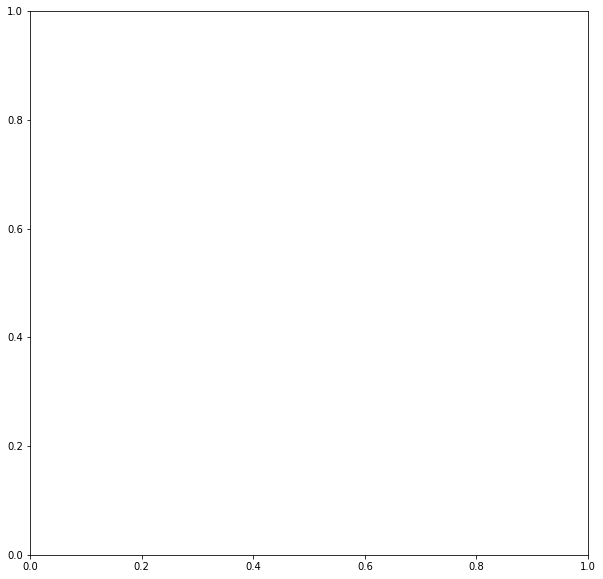

In [12]:
fig, axs = plt.subplots(figsize=(10, 10))

sns.scatterplot(ax=axs, x=forecast_input['WS10'], y=solution['POWER'], label='solution')
sns.scatterplot(ax=axs, x=forecast_input['WS10'], y=prediction, label='ANN')
plt.legend(loc='lower right')

In [ ]:
print("Accuracy training set score: {:.2f}".format(ann.score(X, y)))
print("Accuracy prediction set score: {:.2f}".format(ann.score(forecast_input, solution.filter(['POWER'], axis=1))))

In [ ]:
ann_rmse = np.sqrt(metrics.mean_squared_error(solution['POWER'], prediction))
ann_rmse

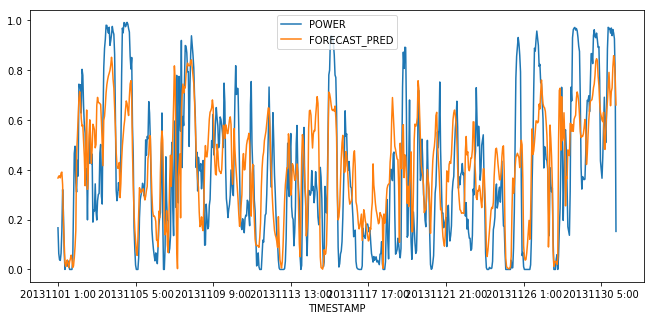

In [13]:
solutionANN = pd.read_csv(data_dir + "Solution.csv")
solvedANN = solutionANN.drop(['POWER'], axis=1)
solvedANN["FORECAST"] = prediction
solvedANN.to_csv(data_dir+"ForecastTemplate1-ANN.csv")

solutionANN = solutionANN.set_index('TIMESTAMP')
solvedPlotANN = solutionANN
solvedPlotANN["FORECAST_PRED"] = prediction
solvedPlotANN.plot(figsize=(11,5))